In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 연봉데이터 로딩, 전처리, EDA, Feature Engineering
# modeling, 성능 검증, 하이퍼파라미터 튜닝

# 기본모델: 의사결정나무(DecisionTree )- 성능 기준
# 배깅, 부스팅, 랜덤배깅 모델 튜닝

## 분석 목적: 학력, 교육, 연수, 혼인상태, 직업정보가 있는 연봉데이터셋을 이용해 연봉 예측하기
## 연봉이 5만달러 이상인지 아닌지

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/salary2.csv")
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


age: 나이<br>
workclass: 직업군<br>
education: 교육 수준<br>
education-num: 교육 연수<br>
marital-status: 결혼 상태<br>
occupation: 직업<br>
relationship: 가족 관계<br>
race: 인종<br>
sex: 성별<br>
capital-gain: 자본 소득<br>
capital-loss: 자본 손실<br>
hours-per-week: 주당 근로 시간<br>
native-country: 출신 국가<br>
class: 소득 등급<br>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [4]:
data.describe(include='all')

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
count,48842.000000,46043,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842
unique,NaN,8,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


# 1. 결측값 처리

In [5]:
data.isna().sum()

age                  0
workclass         2799
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

In [6]:
data.isna().sum() / len(data) * 100

age               0.000000
workclass         5.730724
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.751198
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.754637
class             0.000000
dtype: float64

In [7]:
data['workclass'].unique()

array([' Private', ' Local-gov', nan, ' Self-emp-not-inc', ' Federal-gov',
       ' State-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [8]:
# 나이가 20세 미만
# 미혼모, 미혼부
# 별거중, 멀리 떨어져 있음
data[data['workclass'] == ' Never-worked']

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
8785,17,Never-worked,11th,7,Never-married,NaN,Own-child,Black,Female,0,0,20,United-States,<=50K
11607,20,Never-worked,HS-grad,9,Married-spouse-absent,NaN,Other-relative,White,Male,0,0,35,United-States,<=50K
13898,18,Never-worked,11th,7,Never-married,NaN,Own-child,White,Male,0,0,35,United-States,<=50K
21642,18,Never-worked,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
27126,23,Never-worked,7th-8th,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,<=50K
31053,17,Never-worked,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,<=50K
36618,18,Never-worked,11th,7,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,<=50K
39513,20,Never-worked,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,<=50K
48585,30,Never-worked,HS-grad,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,<=50K
48595,18,Never-worked,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,<=50K


In [9]:
data.loc[data['workclass'] == ' Never-worked', 'occupation'] = 'part-timer'

In [10]:
data[data['workclass'] == ' Without-pay']

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
2957,19,Without-pay,HS-grad,9,Never-married,Other-service,Own-child,White,Male,0,0,10,United-States,<=50K
3177,74,Without-pay,7th-8th,4,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,20,United-States,<=50K
6466,51,Without-pay,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
8903,64,Without-pay,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,60,United-States,>50K
10647,50,Without-pay,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Own-child,White,Female,0,1887,40,United-States,>50K
13836,39,Without-pay,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
14034,27,Without-pay,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Female,0,0,40,United-States,<=50K
18182,65,Without-pay,7th-8th,4,Widowed,Farming-fishing,Unmarried,White,Female,0,0,50,United-States,<=50K
25538,19,Without-pay,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,20,United-States,<=50K
31814,21,Without-pay,HS-grad,9,Never-married,Craft-repair,Own-child,Black,Male,0,0,40,United-States,<=50K


In [11]:
data[data['workclass'].isna() == True]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,NaN,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K
22,72,NaN,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,NaN,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
48812,30,NaN,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,NaN,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
48822,41,NaN,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [12]:
data.loc[data['workclass'].isna() == True, 'workclass'] = 'part-time'

In [13]:
data['occupation'] = data['occupation'].fillna('part-time')

In [14]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [15]:
data.isna().sum()

age                 0
workclass           0
education           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    857
class               0
dtype: int64

In [16]:

data = data.dropna()

In [17]:
data.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47985 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             47985 non-null  int64 
 1   workclass       47985 non-null  object
 2   education       47985 non-null  object
 3   education-num   47985 non-null  int64 
 4   marital-status  47985 non-null  object
 5   occupation      47985 non-null  object
 6   relationship    47985 non-null  object
 7   race            47985 non-null  object
 8   sex             47985 non-null  object
 9   capital-gain    47985 non-null  int64 
 10  capital-loss    47985 non-null  int64 
 11  hours-per-week  47985 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           47985 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.5+ MB


In [19]:
cols = list(data.columns)
cols

['age',
 'workclass',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'class']

In [20]:
data['workclass'].apply(lambda x: x.strip())
#문자열 좌우 공백 없애는 코드

0             Private
1             Private
2           Local-gov
3             Private
4           part-time
             ...     
48837         Private
48838         Private
48839         Private
48840         Private
48841    Self-emp-inc
Name: workclass, Length: 47985, dtype: object

In [24]:
data['workclass'].dtype
#데이터타입= 오브젝트 => '0'

dtype('O')

In [ ]:
#반복문을 이용해 공백 없애주는 작업 자동으로 해주기
for col in cols:
    if data[col].dtype == 'O':
        data[col] = data[col].apply(lambda x: x.strip())

In [22]:
for col in cols:
    if data[col].dtype == 'O':
        print(col, data[col].unique())

workclass ['Private' 'Local-gov' 'part-time' 'Self-emp-not-inc' 'Federal-gov'
 'State-gov' 'Self-emp-inc' 'Without-pay' 'Never-worked']
education ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' '5th-6th' 'Assoc-voc' '9th' 'Doctorate'
 '12th' '1st-4th' 'Preschool']
marital-status ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'part-time'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces' 'part-timer']
relationship ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
race ['Black' 'White' 'Other' 'Amer-Indian-Eskimo' 'Asian-Pac-Islander']
sex ['Male' 'Female']
native-country ['United-States' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'G

# 이상치 탐지

In [31]:
search_outlier = data.describe()

In [32]:
search_outlier.loc['75%', :] + (1.5 * (search_outlier.loc['75%', :] - search_outlier.loc['25%', :]))

age               78.0
education-num     16.5
capital-gain       0.0
capital-loss       0.0
hours-per-week    52.5
dtype: float64

In [33]:
search_outlier

,age,education-num,capital-gain,capital-loss,hours-per-week
count,47985.000000,47985.000000,47985.000000,47985.000000,47985.000000
mean,38.641284,10.067229,1067.032093,87.370553,40.411483
std,13.729622,2.560534,7373.256663,402.681462,12.391073
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


* capital-gain capital-loss 히스토그램 그리기
* hours-per-week 이상값을 가진 데이터 찾아보기

# EDA

In [ ]:
#살펴보는 초기에 무작정 없애지 않고 새로운 컬럼 만들어두고 나중에 삭제하는 것
data['capital-gain-yes']

In [92]:
age_class=data[['age','class']].groupby('age').describe()
age_class

class                                             
      count      mean       std  min  25%  50%  75%  max
age                                                     
17    592.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
18    851.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
19   1047.0  0.002865  0.053478  0.0  0.0  0.0  0.0  1.0
20   1099.0  0.000910  0.030165  0.0  0.0  0.0  0.0  1.0
21   1080.0  0.005556  0.074363  0.0  0.0  0.0  0.0  1.0
..      ...       ...       ...  ...  ...  ...  ...  ...
86      1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0
87      3.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
88      5.0  0.200000  0.447214  0.0  0.0  0.0  0.0  1.0
89      2.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
90     54.0  0.240741  0.431548  0.0  0.0  0.0  0.0  1.0

[74 rows x 8 columns]

# feature engineering

## capital-gain	capital-loss	  히스토그램그리기
### hours-per-week 이상값을 가진 데이터 찾아보기

<Axes: xlabel='capital-gain', ylabel='Count'>

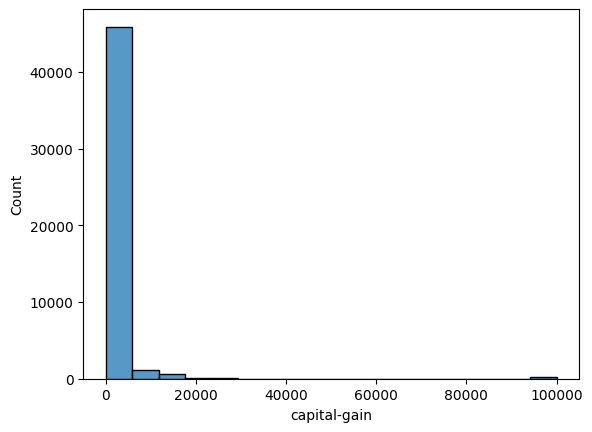

In [34]:
sns.histplot(data['capital-gain'])

<Axes: xlabel='capital-loss', ylabel='Count'>

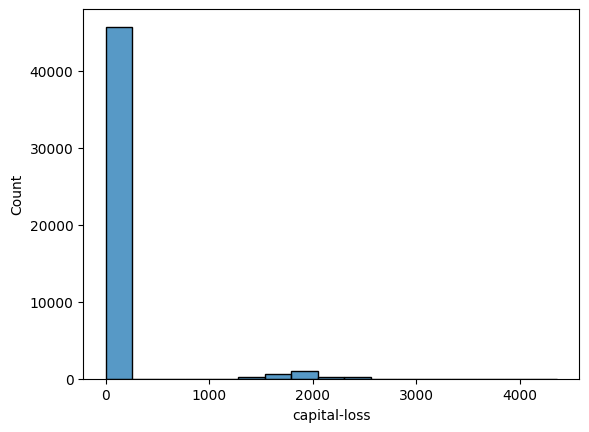

In [35]:
sns.histplot(data['capital-loss'])

In [36]:
print(len(data[data['hours-per-week'] > 52.5]))
data[data['hours-per-week'] > 52.5]

5111


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
25,45,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,90,United-States,>50K
27,23,Private,HS-grad,9,Separated,Machine-op-inspct,Unmarried,Black,Male,0,0,54,United-States,<=50K
29,32,Self-emp-not-inc,Some-college,10,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,60,United-States,<=50K
53,22,Private,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,14084,0,60,United-States,>50K
54,38,Private,9th,5,Married-spouse-absent,Exec-managerial,Not-in-family,White,Male,0,0,54,Mexico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,part-time,Bachelors,13,Married-civ-spouse,part-time,Wife,White,Female,0,0,55,United-States,>50K
48812,30,part-time,Bachelors,13,Never-married,part-time,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48813,34,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
48817,34,Private,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,55,United-States,>50K


In [79]:

data[data['capital-gain'] > 0.0]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
7,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
10,65,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
14,48,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3103,0,48,United-States,>50K
25,45,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,90,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48796,66,Federal-gov,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,3471,0,40,United-States,<=50K
48799,57,Local-gov,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,>50K
48819,38,Private,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
48829,65,Self-emp-not-inc,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K


In [41]:
data[(data['hours-per-week'] > 52.5) & (data['class'] == '>50K')]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
25,45,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,90,United-States,>50K
53,22,Private,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,14084,0,60,United-States,>50K
66,41,Self-emp-inc,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,15024,0,60,United-States,>50K
87,55,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,56,United-States,>50K
128,27,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,Ireland,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48721,30,Self-emp-not-inc,Some-college,10,Married-spouse-absent,Craft-repair,Own-child,White,Male,0,0,60,United-States,>50K
48787,38,Private,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,55,United-States,>50K
48811,35,part-time,Bachelors,13,Married-civ-spouse,part-time,Wife,White,Female,0,0,55,United-States,>50K
48813,34,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K


In [60]:
data[(data['class'] == '>50K')]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
7,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
10,65,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
14,48,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3103,0,48,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48820,71,part-time,Doctorate,16,Married-civ-spouse,part-time,Husband,White,Male,0,0,10,United-States,>50K
48826,39,Local-gov,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
48835,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [61]:
data[(data['class'] == '<=50K')]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
4,18,part-time,Some-college,10,Never-married,part-time,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,part-time,HS-grad,9,Never-married,part-time,Unmarried,Black,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48834,32,Private,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
48836,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [55]:
data[['hours-per-week','class']].groupby('class').value_counts(sort=False)

class  hours-per-week
<=50K  1                 22
       2                 41
       3                 56
       4                 77
       5                 84
                         ..
>50K   95                 1
       96                 1
       97                 1
       98                 3
       99                41
Name: count, Length: 181, dtype: int64

In [59]:
data[data['class'] == '>50K']['hours-per-week'].describe()

count    11467.000000
mean        45.455481
std         11.093493
min          1.000000
25%         40.000000
50%         40.000000
75%         50.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [62]:
data[data['class'] == '<=50K']['hours-per-week'].describe()

count    36518.000000
mean        38.827619
std         12.353673
min          1.000000
25%         35.000000
50%         40.000000
75%         40.000000
max         99.000000
Name: hours-per-week, dtype: float64

* 'hours-per-week'는 관련없는듯

In [80]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'class'],
      dtype='object')

* 'education'컬럼 삭제
* age는 10대 20대로 변경?
* 

In [86]:
data['class'] = data['class'].str.replace(">50K", '1').str.replace("<=50K", '0')

data['class'] = data['class'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47985 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             47985 non-null  int64 
 1   workclass       47985 non-null  object
 2   education       47985 non-null  object
 3   education-num   47985 non-null  int64 
 4   marital-status  47985 non-null  object
 5   occupation      47985 non-null  object
 6   relationship    47985 non-null  object
 7   race            47985 non-null  object
 8   sex             47985 non-null  object
 9   capital-gain    47985 non-null  int64 
 10  capital-loss    47985 non-null  int64 
 11  hours-per-week  47985 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           47985 non-null  int32 
dtypes: int32(1), int64(5), object(8)
memory usage: 5.3+ MB


C:\Users\5-06\AppData\Local\Temp\ipykernel_2548\2691861052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['class'] = data['class'].str.replace(">50K", '1').str.replace("<=50K", '0')
C:\Users\5-06\AppData\Local\Temp\ipykernel_2548\2691861052.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['class'] = data['class'].astype('int')


#### class
* " >50K", '1' & " <=50K", '0'

In [87]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,part-time,Some-college,10,Never-married,part-time,Own-child,White,Female,0,0,30,United-States,0


In [88]:
data = data.drop(['education'], axis=1)

In [89]:
data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,part-time,10,Never-married,part-time,Own-child,White,Female,0,0,30,United-States,0


In [82]:
data['education-num'].value_counts(sort=True)

education-num
9     15586
10    10723
13     7815
14     2579
11     2038
7      1800
12     1579
6      1372
4       931
15      808
5       745
8       635
16      562
3       490
2       240
1        82
Name: count, dtype: int64

In [83]:
data['education-num'].describe()

count    47985.000000
mean        10.067229
std          2.560534
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64

In [85]:
data[data['class'] == '>50K']['education-num'].value_counts(sort=True)

education-num
13    3236
9     2481
10    2037
14    1422
15     603
11     517
16     411
12     407
7       91
6       86
4       59
8       45
5       39
3       24
2        8
1        1
Name: count, dtype: int64

* 1~8 ->

In [63]:
data[['workclass', 'occupation','class']].groupby('class').value_counts(sort=False)

class  workclass    occupation       
<=50K  Federal-gov  Adm-clerical         328
                    Armed-Forces          10
                    Craft-repair          58
                    Exec-managerial      126
                    Farming-fishing        7
                                        ... 
>50K   State-gov    Tech-support          12
                    Transport-moving       7
       Without-pay  Handlers-cleaners      1
                    Machine-op-inspct      1
       part-time    part-time            259
Name: count, Length: 162, dtype: int64

In [64]:
data[data['class'] == '>50K']['workclass'].value_counts(sort=False)

workclass
Local-gov            915
Private             7251
Self-emp-not-inc    1059
State-gov            520
Self-emp-inc         912
part-time            259
Federal-gov          549
Without-pay            2
Name: count, dtype: int64

In [65]:
data['workclass'].value_counts(sort=False)

workclass
Private             33307
Local-gov            3100
part-time            2753
Self-emp-not-inc     3796
Federal-gov          1406
State-gov            1946
Self-emp-inc         1646
Without-pay            21
Never-worked           10
Name: count, dtype: int64

<Axes: xlabel='workclass,class'>

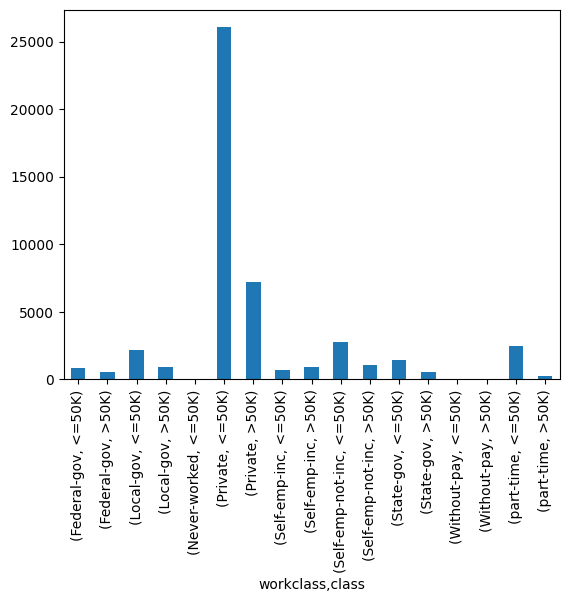

In [78]:
data.groupby('workclass')['class'].value_counts(sort=False).plot(kind='bar')

<Axes: xlabel='workclass'>

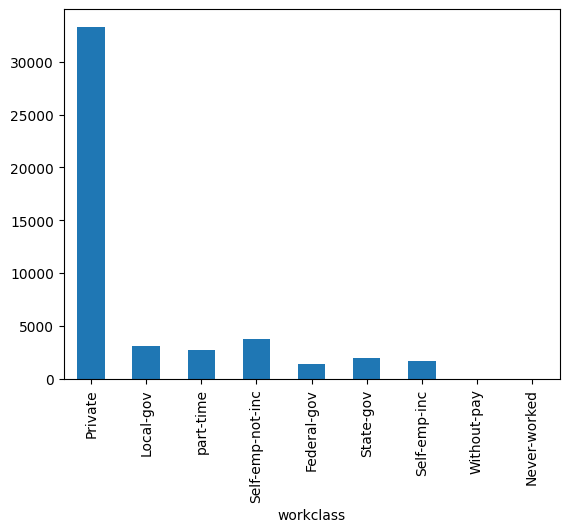

In [77]:
data['workclass'].value_counts(sort=False).plot(kind='bar')

In [70]:
data['occupation'].value_counts(sort=True)

occupation
Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5540
Sales                5408
Other-service        4808
Machine-op-inspct    2970
part-time            2753
Transport-moving     2316
Handlers-cleaners    2046
Farming-fishing      1480
Tech-support         1420
Protective-serv       976
Priv-house-serv       232
Armed-Forces           14
part-timer             10
Name: count, dtype: int64

In [69]:
data[data['class'] == '>50K']['occupation'].value_counts(sort=True)

occupation
Exec-managerial      2867
Prof-specialty       2704
Sales                1455
Craft-repair         1355
Adm-clerical          756
Transport-moving      478
Tech-support          411
Machine-op-inspct     365
Protective-serv       307
part-time             259
Other-service         196
Farming-fishing       172
Handlers-cleaners     135
Armed-Forces            4
Priv-house-serv         3
Name: count, dtype: int64

In [73]:
data[data['class'] == '>50K']['occupation']

2          Protective-serv
3        Machine-op-inspct
7           Prof-specialty
10       Machine-op-inspct
14       Machine-op-inspct
               ...        
48820            part-time
48826         Adm-clerical
48835      Exec-managerial
48838    Machine-op-inspct
48841      Exec-managerial
Name: occupation, Length: 11467, dtype: object

# 결측값 처리 결과

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  48842 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


# EDA

In [50]:
data[['age']].describe() 

,age
count,48842.000000
mean,38.643585
std,13.710510
min,17.000000
25%,28.000000
50%,37.000000
75%,48.000000
max,90.000000


In [54]:
11687/48842*100

23.928176569346054

In [56]:

def ages(x):
    if 10 <= x < 20:
        return "10s"
    elif 20 <= x < 30:
        return "20s"
    elif 30 <= x < 40:
        return "30s"
    elif 40 <= x < 50:
        return "40s"
    elif 50 <= x < 60:
        return "50s"
    elif 60 <= x < 70:
        return "60s"
    elif 70 <= x < 80:
        return "70s"
    elif 80 <= x < 90:
        return "80s"
    elif 90 <= x < 100:
        return "90s"

In [57]:
data['age'] = data['age'].apply(ages)

In [58]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,20s,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,30s,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,20s,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,40s,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,10s,Private,Some-college,10,Never-married,unknown,Own-child,White,Female,0,0,30,United-States,<=50K


In [59]:
data.groupby('age')['class'].value_counts(sort=False)

age  class
10s  <=50K     2507
     >50K         3
20s  <=50K    11262
     >50K       743
30s  <=50K     9468
     >50K      3461
40s  <=50K     6738
     >50K      3986
50s  <=50K     4110
     >50K      2509
60s  <=50K     2245
     >50K       809
70s  <=50K      668
     >50K       147
80s  <=50K      115
     >50K        16
90s  <=50K       42
     >50K        13
Name: count, dtype: int64

In [62]:
data.loc[data['class'] == ' >50K', 'age'].value_counts(sort=True)

age
40s    3986
30s    3461
50s    2509
60s     809
20s     743
70s     147
80s      16
90s      13
10s       3
Name: count, dtype: int64

In [67]:
data[['education-num', 'class']].groupby('class').value_counts(sort=True)

class  education-num
<=50K  1                   82
       2                  239
       3                  482
       4                  893
       5                  715
       6                 1302
       7                 1720
       8                  609
       9                13281
       10                8815
       11                1539
       12                1188
       13                4712
       14                1198
       15                 217
       16                 163
>50K   1                    1
       2                    8
       3                   27
       4                   62
       5                   41
       6                   87
       7                   92
       8                   48
       9                 2503
       10                2063
       11                 522
       12                 413
       13                3313
       14                1459
       15                 617
       16                 431
Name: count, dtype:

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  object
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  48842 non-null  object
 13  class           48842 non-null  object
dtypes: int64(4), object(10)
memory usage: 5.2+ MB


In [71]:
data['class'] = data['class'].str.replace(" >50K", '1').str.replace(" <=50K", '0')

data['class'] = data['class'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  object
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  48842 non-null  object
 13  class           48842 non-null  int32 
dtypes: int32(1), int64(4), object(9)
memory usage: 5.0+ MB


#### class
* " >50K", '1' & " <=50K", '0'

In [72]:
data_corr = data[['education-num', 'capital-gain','capital-loss','hours-per-week', 'class' ]].corr()
data_corr

,education-num,capital-gain,capital-loss,hours-per-week,class
education-num,1.000000,0.125146,0.080972,0.143689,0.332613
capital-gain,0.125146,1.000000,-0.031441,0.082157,0.223013
capital-loss,0.080972,-0.031441,1.000000,0.054467,0.147554
hours-per-week,0.143689,0.082157,0.054467,1.000000,0.227687
class,0.332613,0.223013,0.147554,0.227687,1.000000
